# Cleaned Code

In [21]:
import os
import pandas as pd
import numpy as np
import re
from scipy.stats import gmean
from scipy import stats
import matplotlib.pyplot as plt

Belgium


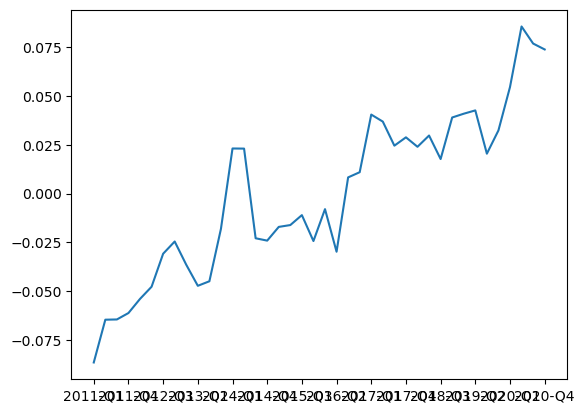

Poland


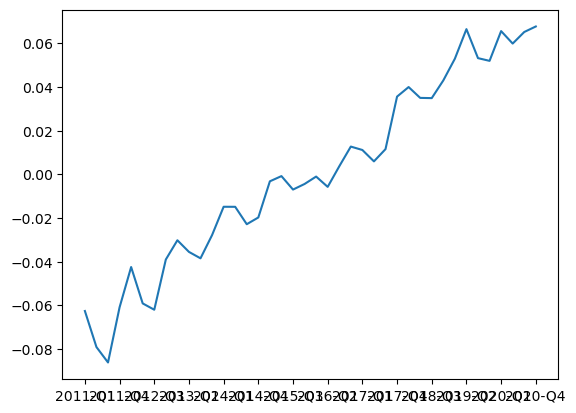

Spain


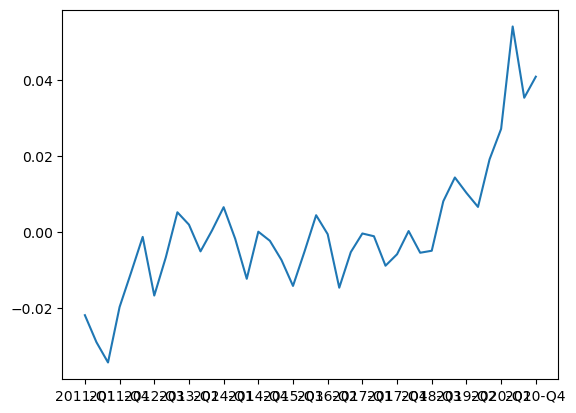

In [28]:

# Sets the path to the parent directory of RR classes
parent_dir = r"C:\Users\Mustafa\Desktop\DSBA\3. Yıl 2. Dönem\Reproducible Research\RETAKE\RRcourse2023\6. Coding and documentation"
os.chdir(parent_dir)

# Import data from the O*NET database
task_data = pd.read_csv("Data\\onet_tasks.csv")

# Read employment data from Eurostat
isco_sheets = ["ISCO1", "ISCO2", "ISCO3", "ISCO4", "ISCO5", "ISCO6", "ISCO7", "ISCO8", "ISCO9"]
isco_data = {}

for sheet in isco_sheets:
    isco_data[sheet] = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name=sheet)

# Calculate worker totals in each country
country_columns = ["Belgium", "Spain", "Poland"]
total_country = pd.DataFrame()

for country in country_columns:
    total_country[country] = sum(isco_data[sheet][country] for sheet in isco_sheets)

# Cleaned code that calculates worker totals

# Create a list of isco dataframes
isco_dataframes = [isco1, isco2, isco3, isco4, isco5, isco6, isco7, isco8, isco9]

# Add the 'ISCO' column to each dataframe
for idx, isco_df in enumerate(isco_dataframes, start=1):
    isco_df['ISCO'] = idx

# Concatenate all the dataframes
all_data = pd.concat(isco_dataframes, ignore_index=True)

# Add the calculated total columns
total_columns = ["total_Belgium", "total_Spain", "total_Poland"]
total_countries = [total_Belgium, total_Spain, total_Poland]

for col, total_country in zip(total_columns, total_countries):
    all_data[col] = pd.concat([total_country] * len(isco_dataframes), ignore_index=True)

# Calculate share columns
share_columns = ["share_Belgium", "share_Spain", "share_Poland"]
country_columns = ["Belgium", "Spain", "Poland"]

for share_col, country_col, total_col in zip(share_columns, country_columns, total_columns):
    all_data[share_col] = all_data[country_col] / all_data[total_col]

# Refactored code for merging datasets and calculating shares

task_data["isco08_1dig"] = task_data["isco08"].astype(str).str[:1].astype(int)

# And we'll calculate the mean task values at a 1-digit level 
aggdata = task_data.groupby(["isco08_1dig"]).mean()
aggdata = aggdata.drop(columns=["isco08"])

#Let's combine the data.
combined = pd.merge(all_data, aggdata, left_on='ISCO', right_on='isco08_1dig', how='left')



task_items = ["t_4A2a4", "t_4A2b2", "t_4A4a1"]

for task_item in task_items:
    for country_col, share_col in zip(country_columns, share_columns):
        temp_mean = np.average(combined[task_item], weights=combined[share_col])
        temp_sd = np.sqrt(np.average((combined[task_item] - temp_mean)**2, weights=combined[share_col]))
        std_col_name = f"std_{country_col}_{task_item}"
        combined[std_col_name] = (combined[task_item] - temp_mean) / temp_sd

# Cleaned code for task item standardization


# Calculate the non-routine cognitive analytical tasks for each country
nrca_countries = ["Belgium", "Poland", "Spain"]

for country in nrca_countries:
    std_columns = [f"std_{country}_t_4A2a4", f"std_{country}_t_4A2b2", f"std_{country}_t_4A4a1"]
    combined[f"{country}_NRCA"] = combined[std_columns].sum(axis=1)

    temp_mean = np.average(combined[f"{country}_NRCA"], weights=combined[f"share_{country}"])
    temp_sd = np.sqrt(np.average((combined[f"{country}_NRCA"] - temp_mean)**2, weights=combined[f"share_{country}"]))
    combined[f"std_{country}_NRCA"] = (combined[f"{country}_NRCA"] - temp_mean) / temp_sd

    combined[f"multip_{country}_NRCA"] = combined[f"std_{country}_NRCA"] * combined[f"share_{country}"]

    agg_country = combined.groupby(["TIME"])[f"multip_{country}_NRCA"].sum().reset_index()

    print(country)
    
    plt.plot(agg_country["TIME"], agg_country[f"multip_{country}_NRCA"])
    plt.xticks(range(0, len(agg_country), 3), agg_country["TIME"][::3])
    plt.show()

# Cleaned code for NRCA calculation and plotting

# Uncleaned Code

In [ ]:
import os
import pandas as pd

# Sets the path to the parent directory of RR classes
os.chdir(r"C:\Users\Mustafa\Desktop\DSBA\3. Yıl 2. Dönem\Reproducible Research\RETAKE\RRcourse2023\6. Coding and documentation")

# Import data from the O*NET database, at ISCO-08 occupation level.
# The original data uses a version of SOC classification, but the data we load here
# are already cross-walked to ISCO-08 using: https://ibs.org.pl/en/resources/occupation-classifications-crosswalks-from-onet-soc-to-isco/

# The O*NET database contains information for occupations in the USA, including
# the tasks and activities typically associated with a specific occupation.

task_data = pd.read_csv("Data\\onet_tasks.csv")
# isco08 variable is for occupation codes
# the t_* variables are specific tasks conducted on the job

# read employment data from Eurostat
# These datasets include quarterly information on the number of workers in specific
# 1-digit ISCO occupation categories. (Check here for details: https://www.ilo.org/public/english/bureau/stat/isco/isco08/)

isco1 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO1")
isco2 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO2")
isco3 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO3")
isco4 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO4")
isco5 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO5")
isco6 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO6")
isco7 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO7")
isco8 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO8")
isco9 = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name="ISCO9")

# We will focus on three countries, but perhaps we could clean this code to allow it
# to easily run for all the countries in the sample?

# This will calculate worker totals in each of the chosen countries.
total_Belgium = isco1["Belgium"] + isco2["Belgium"] + isco3["Belgium"] + isco4["Belgium"] + isco5["Belgium"] + isco6["Belgium"] + isco7["Belgium"] + isco8["Belgium"] + isco9["Belgium"]
total_Spain = isco1["Spain"] + isco2["Spain"] + isco3["Spain"] + isco4["Spain"] + isco5["Spain"] + isco6["Spain"] + isco7["Spain"] + isco8["Spain"] + isco9["Spain"]
total_Poland = isco1["Poland"] + isco2["Poland"] + isco3["Poland"] + isco4["Poland"] + isco5["Poland"] + isco6["Poland"] + isco7["Poland"] + isco8["Poland"] + isco9["Poland"]


In [26]:
import pandas as pd

# Let's merge all these datasets. We'll need a column that stores the occupation categories:
isco1['ISCO'] = 1
isco2['ISCO'] = 2
isco3['ISCO'] = 3
isco4['ISCO'] = 4
isco5['ISCO'] = 5
isco6['ISCO'] = 6
isco7['ISCO'] = 7
isco8['ISCO'] = 8
isco9['ISCO'] = 9

# and this gives us one large file with employment in all occupations.
all_data = pd.concat([isco1, isco2, isco3, isco4, isco5, isco6, isco7, isco8, isco9], ignore_index=True)

# We have 9 occupations and the same time range for each, so we can add the totals by
# adding a vector that is 9 times the previously calculated totals
all_data["total_Belgium"] = pd.concat([total_Belgium]*9, ignore_index=True)
all_data["total_Spain"] = pd.concat([total_Spain]*9, ignore_index=True)
all_data["total_Poland"] = pd.concat([total_Poland]*9, ignore_index=True)

# And this will give us shares of each occupation among all workers in a period-country
all_data['share_Belgium'] = all_data['Belgium'] / all_data['total_Belgium']
all_data['share_Spain'] = all_data['Spain'] / all_data['total_Spain']
all_data['share_Poland'] = all_data['Poland'] / all_data['total_Poland']

In [32]:
# Now let's look at the task data. We want the first digit of the ISCO variable only
import pandas as pd
import numpy as np
import re

task_data["isco08_1dig"] = task_data["isco08"].astype(str).str[:1].astype(int)

# And we'll calculate the mean task values at a 1-digit level 
# (more on what these tasks are below)
aggdata = task_data.groupby(["isco08_1dig"]).mean()
aggdata = aggdata.drop(columns=["isco08"])

# We'll be interested in tracking the intensity of Non-routine cognitive analytical tasks
# Using a framework reminiscent of the work by David Autor.

#These are the ones we're interested in:
# Non-routine cognitive analytical
# 4.A.2.a.4 Analyzing Data or Information
# 4.A.2.b.2 Thinking Creatively
# 4.A.4.a.1 Interpreting the Meaning of Information for Others

#Let's combine the data.
combined = pd.merge(all_data, aggdata, left_on='ISCO', right_on='isco08_1dig', how='left')
# Traditionally, the first step is to standardise the task values using weights 
# defined by share of occupations in the labour force. This should be done separately
# for each country. Standardisation -> getting the mean to 0 and std. dev. to 1.
# Let's do this for each of the variables that interests us:



In [33]:
from scipy.stats import gmean
#first task item

temp_mean=np.average(combined["t_4A2a4"],weights=combined["share_Belgium"])
temp_sd=np.sqrt(np.average((combined["t_4A2a4"]-temp_mean)**2,weights=combined["share_Belgium"]))
combined["std_Belgium_t_4A2a4"]=(combined["t_4A2a4"]-temp_mean)/temp_sd

temp_mean=np.average(combined["t_4A2a4"],weights=combined["share_Poland"])
temp_sd=np.sqrt(np.average((combined["t_4A2a4"]-temp_mean)**2,weights=combined["share_Poland"]))
combined["std_Poland_t_4A2a4"]=(combined["t_4A2a4"]-temp_mean)/temp_sd

temp_mean=np.average(combined["t_4A2a4"],weights=combined["share_Spain"])
temp_sd=np.sqrt(np.average((combined["t_4A2a4"]-temp_mean)**2,weights=combined["share_Spain"]))
combined["std_Spain_t_4A2a4"]=(combined["t_4A2a4"]-temp_mean)/temp_sd
#second task item

temp_mean=np.average(combined["t_4A2b2"],weights=combined["share_Belgium"])
temp_sd=np.sqrt(np.average((combined["t_4A2b2"]-temp_mean)**2,weights=combined["share_Belgium"]))
combined["std_Belgium_t_4A2b2"]=(combined["t_4A2b2"]-temp_mean)/temp_sd

temp_mean=np.average(combined["t_4A2b2"],weights=combined["share_Poland"])
temp_sd=np.sqrt(np.average((combined["t_4A2b2"]-temp_mean)**2,weights=combined["share_Poland"]))
combined["std_Poland_t_4A2b2"]=(combined["t_4A2b2"]-temp_mean)/temp_sd

temp_mean=np.average(combined["t_4A2b2"],weights=combined["share_Spain"])
temp_sd=np.sqrt(np.average((combined["t_4A2b2"]-temp_mean)**2,weights=combined["share_Spain"]))
combined["std_Spain_t_4A2b2"]=(combined["t_4A2b2"]-temp_mean)/temp_sd

#third task item

temp_mean=np.average(combined["t_4A4a1"],weights=combined["share_Belgium"])
temp_sd=np.sqrt(np.average((combined["t_4A4a1"]-temp_mean)**2,weights=combined["share_Belgium"]))
combined["std_Belgium_t_4A4a1"]=(combined["t_4A4a1"]-temp_mean)/temp_sd

temp_mean=np.average(combined["t_4A4a1"],weights=combined["share_Poland"])
temp_sd=np.sqrt(np.average((combined["t_4A4a1"]-temp_mean)**2,weights=combined["share_Poland"]))
combined["std_Poland_t_4A4a1"]=(combined["t_4A4a1"]-temp_mean)/temp_sd

temp_mean=np.average(combined["t_4A4a1"],weights=combined["share_Spain"])
temp_sd=np.sqrt(np.average((combined["t_4A4a1"]-temp_mean)**2,weights=combined["share_Spain"]))
combined["std_Spain_t_4A4a1"]=(combined["t_4A4a1"]-temp_mean)/temp_sd

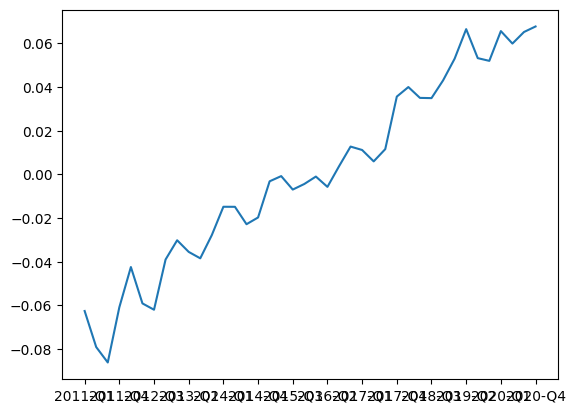

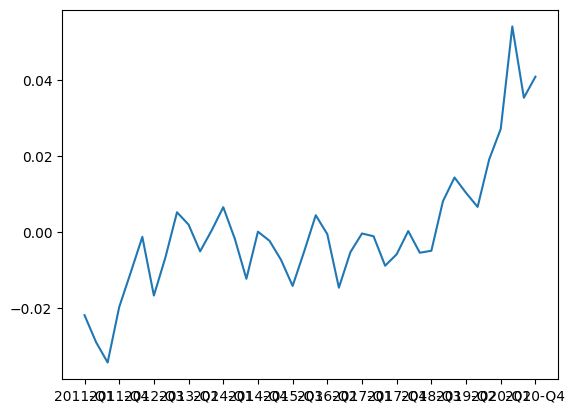

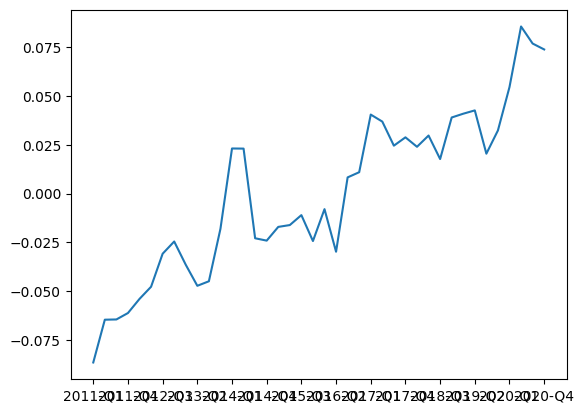

In [34]:
# The next step is to calculate the `classic` task content intensity, i.e.
# how important is a particular general task content category in the workforce
# Here, we're looking at non-routine cognitive analytical tasks, as defined
# by David Autor and Darron Acemoglu:

from scipy import stats

combined["Belgium_NRCA"] = combined["std_Belgium_t_4A2a4"] + combined["std_Belgium_t_4A2b2"] + combined["std_Belgium_t_4A4a1"]
combined["Poland_NRCA"] = combined["std_Poland_t_4A2a4"] + combined["std_Poland_t_4A2b2"] + combined["std_Poland_t_4A4a1"]
combined["Spain_NRCA"] = combined["std_Spain_t_4A2a4"] + combined["std_Spain_t_4A2b2"] + combined["std_Spain_t_4A4a1"]

# And we standardise NRCA in a similar way.
temp_mean = np.average(combined["Belgium_NRCA"], weights=combined["share_Belgium"])
temp_sd = np.sqrt(np.average((combined["Belgium_NRCA"] - temp_mean)**2, weights=combined["share_Belgium"]))
combined["std_Belgium_NRCA"] = (combined["Belgium_NRCA"] - temp_mean) / temp_sd

temp_mean = np.average(combined["Poland_NRCA"], weights=combined["share_Poland"])
temp_sd = np.sqrt(np.average((combined["Poland_NRCA"] - temp_mean)**2, weights=combined["share_Poland"]))
combined["std_Poland_NRCA"] = (combined["Poland_NRCA"] - temp_mean) / temp_sd

temp_mean = np.average(combined["Spain_NRCA"], weights=combined["share_Spain"])
temp_sd = np.sqrt(np.average((combined["Spain_NRCA"] - temp_mean)**2, weights=combined["share_Spain"]))
combined["std_Spain_NRCA"] = (combined["Spain_NRCA"] - temp_mean) / temp_sd


# Finally, to track the changes over time, we have to calculate a country-level mean
# Step 1: multiply the value by the share of such workers.
combined["multip_Spain_NRCA"] = combined["std_Spain_NRCA"] * combined["share_Spain"]
combined["multip_Belgium_NRCA"] = combined["std_Belgium_NRCA"] * combined["share_Belgium"]
combined["multip_Poland_NRCA"] = combined["std_Poland_NRCA"] * combined["share_Poland"]

# Step 2: sum it up (it basically becomes another weighted mean)

agg_Spain = combined.groupby(["TIME"])["multip_Spain_NRCA"].sum().reset_index()
agg_Belgium = combined.groupby(["TIME"])["multip_Belgium_NRCA"].sum().reset_index()
agg_Poland = combined.groupby(["TIME"])["multip_Poland_NRCA"].sum().reset_index()

# We can plot it now!

import matplotlib.pyplot as plt
plt.plot(agg_Poland["TIME"], agg_Poland["multip_Poland_NRCA"])
plt.xticks(range(0, len(agg_Poland), 3), agg_Poland["TIME"][::3])
plt.show()

plt.plot(agg_Spain["TIME"], agg_Spain["multip_Spain_NRCA"])
plt.xticks(range(0, len(agg_Spain), 3), agg_Spain["TIME"][::3])
plt.show()

plt.plot(agg_Belgium["TIME"], agg_Belgium["multip_Belgium_NRCA"])
plt.xticks(range(0, len(agg_Belgium), 3), agg_Belgium["TIME"][::3])
plt.show()

# If this code gets automated and cleaned properly,
#  you should be able to easily add other countries as well as other tasks.
# E.g.:

# Routine manual
# 4.A.3.a.3	Controlling Machines and Processes
# 4.C.2.d.1.i	Spend Time Making Repetitive Motions
# 4.C.3.d.3	Pace Determined by Speed of Equipment
